In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [114]:
#Loading the CSV
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [115]:
df

,Male,Female,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,1,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,0,1,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,0,1,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,0,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [116]:
print(df.head())  # Display the first few rows
print(df.info())

   Male  Female  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     0       1              0     Yes         No       1           No   
1     1       0              0      No         No      34          Yes   
2     1       0              0      No         No       2          Yes   
3     1       0              0      No         No      45           No   
4     0       1              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No       

In [117]:
#Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [118]:
## Convert binary categorical columns to 0 and 1
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [119]:
df

,Male,Female,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,0,1,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,1,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,0,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [120]:
# Handle missing values (replace NaN values with the mean for 'TotalCharges')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [121]:
# Identify features (X) and the target variable (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

In [122]:
# Convert categorical variables into numerical format (one-hot encoding)
X = pd.get_dummies(X)

In [123]:
#Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:
#Standardizing numerical features (optional but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
#Training the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [126]:
#Making Predictions
predictions = model.predict(X_test)

In [127]:
#Evaluating the Model
accuracy = accuracy_score(y_test, predictions)
lr_conf_matrix = confusion_matrix(y_test, predictions)
lr_classification_rep = classification_report(y_test, predictions)

In [128]:
#Printing results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8204400283889283
Confusion Matrix:
[[934 102]
 [151 222]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [129]:
df

,Male,Female,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,0,1,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,1,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,0,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [130]:
#Precision for class 0 (No churn) is 0.86, indicating that when the model predicts no churn, it is correct 86% of the time.
#Precision for class 1 (Churn) is 0.69, indicating that when the model predicts churn, it is correct 69% of the time.

In [131]:
#Recall for class 0 is 0.90, indicating that the model correctly identifies 90% of the actual no churn instances.
#Recall for class 1 is 0.60, indicating that the model correctly identifies 60% of the actual churn instances.

In [132]:
#The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
#F1-score for class 0 is high (0.88), indicating a good balance between precision and recall.
#F1-score for class 1 is 0.64, which is a bit lower, indicating some room for improvement.

In [133]:
#The number of actual occurrences of each class in the specified dataset

In [134]:
#Improving further accuracy by random forest
from sklearn.ensemble import RandomForestClassifier


In [135]:
# Step 8: Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [136]:
# Step 9: Make Predictions
rf_predictions = rf_model.predict(X_test)

In [137]:
# Step 10: Evaluate the Random Forest Model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_classification_rep = classification_report(y_test, rf_predictions)

In [138]:
# Print results for Random Forest
print(f"Random Forest Accuracy: {rf_accuracy}")
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)
print("Random Forest Classification Report:")
print(rf_classification_rep)

Random Forest Accuracy: 0.7934705464868701
Random Forest Confusion Matrix:
[[940  96]
 [195 178]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [139]:
#Precision for class 0 (No churn) is 0.83, indicating that when the model predicts no churn, it is correct 83% of the time.
#Precision for class 1 (Churn) is 0.65, indicating that when the model predicts churn, it is correct 65% of the time.

In [140]:
#Recall for class 0 is 0.90, indicating that the model correctly identifies 90% of the actual no churn instances.
#Recall for class 1 is 0.49, indicating that the model correctly identifies 49% of the actual churn instances.

In [141]:
#F1-score for class 0 is high (0.87), indicating a good balance between precision and recall.
#F1-score for class 1 is 0.56, which is lower compared to class 0.

In [142]:
#Here are some visulizations 

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

C:\Users\Anshul Dubey\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Anshul Dubey\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Anshul Dubey\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


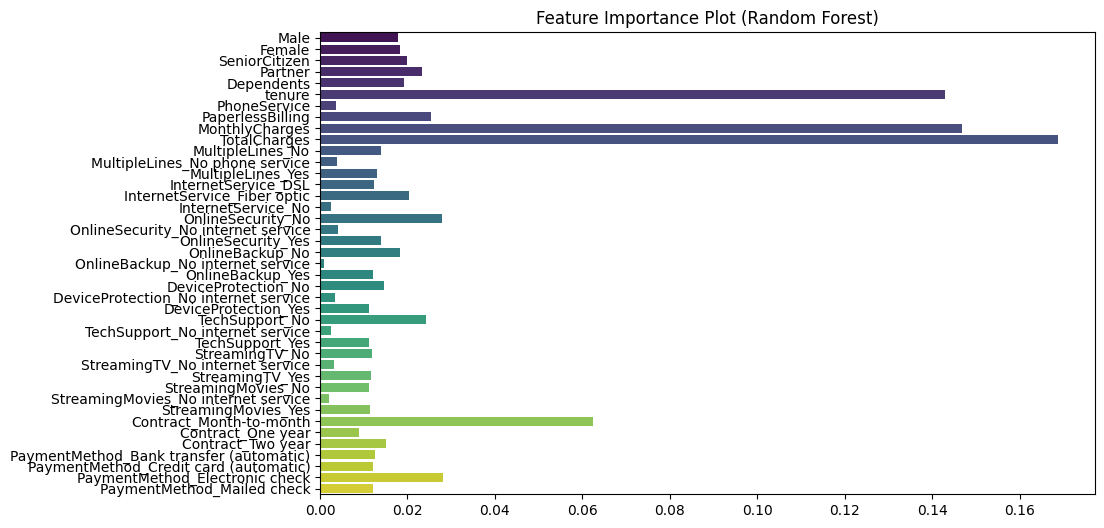

In [144]:
# Feature Importance Plot for Random Forest
feature_importance = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.title("Feature Importance Plot (Random Forest)")
plt.show()

In [145]:
#This plot displays the importance of each feature in the Random Forest model
#Features with higher importance contribute more to the model's predictions
#It helps identify which variables are most influential in predicting customer churn

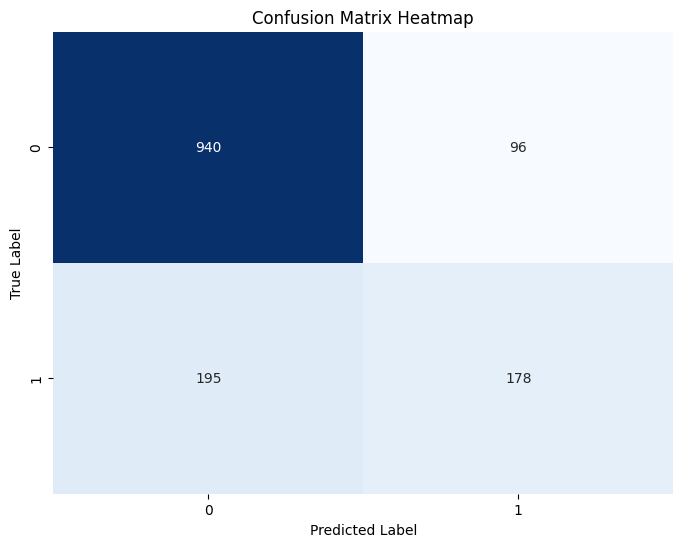

In [146]:
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [147]:
#This heatmap visualizes the confusion matrix for the Random Forest model
#It shows the true positive, true negative, false positive, and false negative predictions
#Brighter colors represent higher values, helping to assess the model's performance.

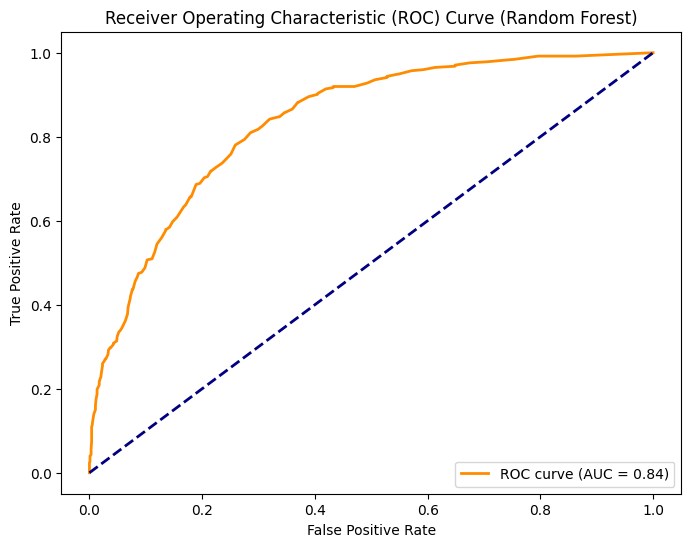

In [148]:
# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()

In [149]:
#The Receiver Operating Characteristic (ROC) curve for the Random Forest model 
#illustrates the trade-off between sensitivity and specificity across different probability thresholds
#The area under the ROC curve (AUC) quantifies the model's ability to distinguish between the two classes.

In [150]:
#lets do logistic regression as well

C:\Users\Anshul Dubey\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Anshul Dubey\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Anshul Dubey\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


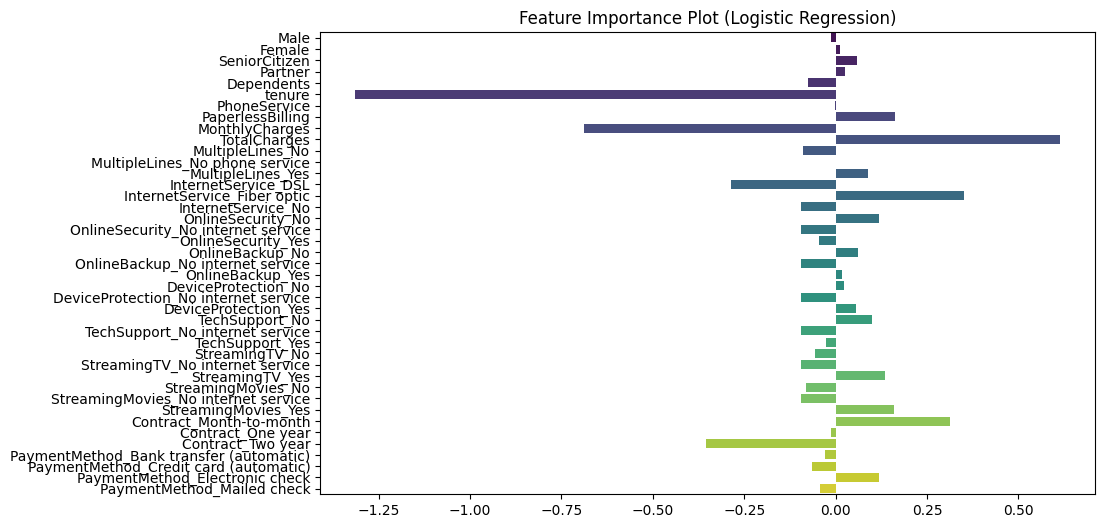

In [151]:
# Feature Importance Plot for Logistic Regression (Coefficients)
coefficients = lr_model.coef_[0]
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=features, palette="viridis")
plt.title("Feature Importance Plot (Logistic Regression)")
plt.show()

In [152]:
#In Logistic Regression, the coefficients represent the impact of each feature on the log-odds of the predicted outcome
#This plot shows the coefficients for each feature
#Positive coefficients indicate a positive impact on the predicted probability of churn, while negative coefficients indicate a negative impact

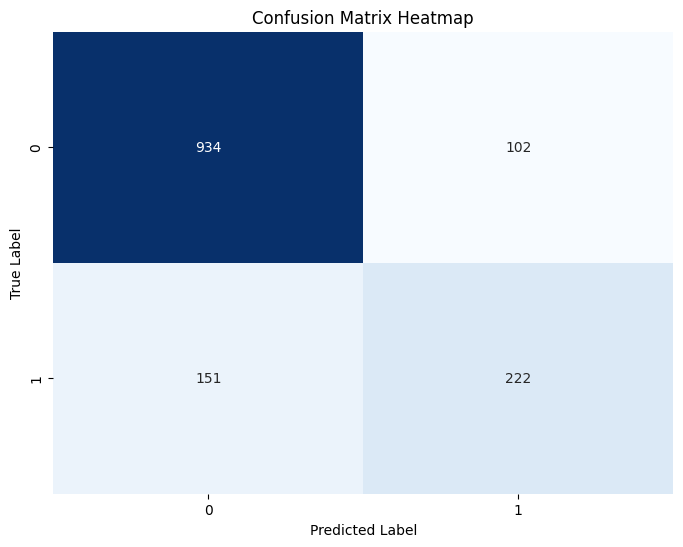

In [153]:
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [154]:
#Similar to the Random Forest Confusion Matrix Heatmap, this heatmap represents the confusion matrix for the Logistic Regression model
#It provides a visual overview of the model's ability to correctly classify instances into true positives, true negatives, false positives, and false negatives

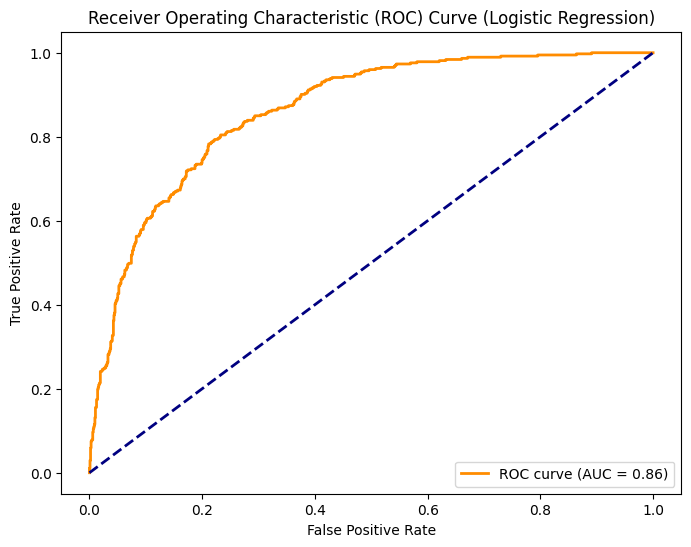

In [155]:
# ROC Curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#